In [1]:
# Import Dependenices 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn style
sns.set_style('whitegrid')
# Import More Dependenices 
%matplotlib inline
import matplotlib
from datetime import datetime
# warnings 
import warnings
warnings.filterwarnings("ignore")

# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import json 
import csv

In [2]:
#Read csv XRP
xrp_csv = pd.read_csv("resources/XRPUSD.csv")
xrp_csv.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06


In [3]:
# Read CSV bitcoin 
btc_csv = pd.read_csv("resources/BTCUSD.csv")
btc_csv.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1643846400,2022-02-03 00:00:00,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [4]:
# ethereum
eth_csv = pd.read_csv("resources/ETHUSD.csv")
eth_csv.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [5]:
# lite coin 
ltc_csv = pd.read_csv("resources/LTCUSD.csv")
ltc_csv.head()

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [6]:
#Merge XRP & BTC
combined_xrp_btc_df = pd.merge(xrp_csv, btc_csv, on=["unix","date"])
combined_xrp_btc_df.head()

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [7]:
#rename columns 
combined_xrp_btc_df = combined_xrp_btc_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp_btc_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [8]:
combined_three_df = pd.merge(combined_xrp_btc_df, eth_csv, on=["unix","date"])
combined_three_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,BTC Close,Volume BTC,BTC Volume USD,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,36914.82,22.073478,8.148385e+05,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,36923.50,1672.707195,6.176220e+07,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,38733.04,2073.938717,8.032995e+07,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,38491.92,2009.130003,7.733527e+07,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,37941.82,708.794813,2.689297e+07,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [9]:
#rename columns 
combined_three_df = combined_three_df.rename(columns={"symbol":"ETH Symbol",
                                                          "open":"ETH Open",
                                                          "high":"ETH High", 
                                                          "low":"ETH Low",
                                                         "close": "ETH Close",
                                                         "Volume USD":"ETH Volume USD",
                                                         })
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [10]:
#last merge
combined_final_df = pd.merge(combined_three_df, ltc_csv, on=["unix","date"])
combined_final_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [11]:
#rename columns 
combined_final_df = combined_final_df.rename(columns={"symbol":"LTC Symbol",
                                                          "open":"LTC Open",
                                                          "high":"LTC High", 
                                                          "low":"LTC Low",
                                                         "close": "LTC Close",
                                                         "Volume USD":"LTC Volume USD",
                                                         })
combined_final_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [12]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned= combined_final_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03 00:00:00,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02 00:00:00,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01 00:00:00,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31 00:00:00,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30 00:00:00,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,2015-03-01 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,253.47,260.00,245.00,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,2015-02-28 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,253.06,254.29,245.20,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,2015-02-27 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,236.70,256.15,236.16,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,2015-02-26 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,237.97,238.55,234.01,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [13]:
df = cleaned.loc[: 1005, :]
df

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03 00:00:00,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02 00:00:00,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01 00:00:00,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31 00:00:00,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30 00:00:00,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29720,0.29979,0.29002,0.29312,1.295766e+07,3.798151e+06,5945.32,6172.00,5932.83,...,165.23,170.18,48059.873998,8.178829e+06,73.88,75.56,72.19,73.95,40262.792994,2.977434e+06
1002,2019-05-08 00:00:00,0.29326,0.29900,0.29100,0.29685,1.174858e+07,3.487566e+06,5751.54,5986.00,5658.66,...,162.25,169.61,65393.859326,1.109145e+07,73.15,75.00,71.16,73.69,36462.154371,2.686896e+06
1003,2019-05-07 00:00:00,0.30009,0.30385,0.29240,0.29384,1.670085e+07,4.907379e+06,5686.88,5970.00,5686.88,...,165.02,166.15,114664.731301,1.905155e+07,74.27,77.98,72.68,73.25,59685.796134,4.371985e+06
1004,2019-05-06 00:00:00,0.29724,0.30524,0.29130,0.29949,1.253129e+07,3.752995e+06,5714.40,5755.79,5562.44,...,157.63,171.21,85969.260684,1.471880e+07,74.91,76.17,70.99,74.25,46812.282976,3.475812e+06


In [14]:
# Calculating 7 Day Moving Average 
"""
Rolling moving averages are used in technical analysis as a way to analyze by creating date points from the existing dataset. 
MA(7) of BTC, ETH, LTC, & XRP were taken.  
"""
crypto_df = df[['date', 'XRP Close', 'BTC Close', 'ETH Close', 'LTC Close']]
crypto_df

# Starts on Sunday May 05, 2019

,date,XRP Close,BTC Close,ETH Close,LTC Close
0,2022-02-03 00:00:00,0.59873,36914.82,2697.13,108.17
1,2022-02-02 00:00:00,0.60129,36923.50,2682.30,108.37
2,2022-02-01 00:00:00,0.62794,38733.04,2791.04,115.09
3,2022-01-31 00:00:00,0.61740,38491.92,2688.91,109.61
4,2022-01-30 00:00:00,0.60226,37941.82,2602.37,108.79
...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25


In [15]:
crypto_df[ 'BTC_MA(7)' ] = crypto_df['BTC Close'].rolling(7).mean()
crypto_df

,date,XRP Close,BTC Close,ETH Close,LTC Close,BTC_MA(7)
0,2022-02-03 00:00:00,0.59873,36914.82,2697.13,108.17,NaN
1,2022-02-02 00:00:00,0.60129,36923.50,2682.30,108.37,NaN
2,2022-02-01 00:00:00,0.62794,38733.04,2791.04,115.09,NaN
3,2022-01-31 00:00:00,0.61740,38491.92,2688.91,109.61,NaN
4,2022-01-30 00:00:00,0.60226,37941.82,2602.37,108.79,NaN
...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95,7242.300000
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69,6918.328571
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25,6599.120000
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25,6295.607143


In [16]:
crypto_df[ 'ETH_MA(7)' ] = crypto_df['ETH Close'].rolling(7).mean()
crypto_df

,date,XRP Close,BTC Close,ETH Close,LTC Close,BTC_MA(7),ETH_MA(7)
0,2022-02-03 00:00:00,0.59873,36914.82,2697.13,108.17,NaN,NaN
1,2022-02-02 00:00:00,0.60129,36923.50,2682.30,108.37,NaN,NaN
2,2022-02-01 00:00:00,0.62794,38733.04,2791.04,115.09,NaN,NaN
3,2022-01-31 00:00:00,0.61740,38491.92,2688.91,109.61,NaN,NaN
4,2022-01-30 00:00:00,0.60226,37941.82,2602.37,108.79,NaN,NaN
...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95,7242.300000,197.928571
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69,6918.328571,186.617143
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25,6599.120000,179.281429
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25,6295.607143,175.672857


In [17]:
crypto_df[ 'XRP_MA(7)' ] = crypto_df['XRP Close'].rolling(7).mean()
crypto_df

,date,XRP Close,BTC Close,ETH Close,LTC Close,BTC_MA(7),ETH_MA(7),XRP_MA(7)
0,2022-02-03 00:00:00,0.59873,36914.82,2697.13,108.17,NaN,NaN,NaN
1,2022-02-02 00:00:00,0.60129,36923.50,2682.30,108.37,NaN,NaN,NaN
2,2022-02-01 00:00:00,0.62794,38733.04,2791.04,115.09,NaN,NaN,NaN
3,2022-01-31 00:00:00,0.61740,38491.92,2688.91,109.61,NaN,NaN,NaN
4,2022-01-30 00:00:00,0.60226,37941.82,2602.37,108.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95,7242.300000,197.928571,0.344464
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69,6918.328571,186.617143,0.321493
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25,6599.120000,179.281429,0.305283
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25,6295.607143,175.672857,0.301846


In [18]:
crypto_df[ 'LTC_MA(7)' ] = crypto_df['LTC Close'].rolling(7).mean()
crypto_df

,date,XRP Close,BTC Close,ETH Close,LTC Close,BTC_MA(7),ETH_MA(7),XRP_MA(7),LTC_MA(7)
0,2022-02-03 00:00:00,0.59873,36914.82,2697.13,108.17,NaN,NaN,NaN,NaN
1,2022-02-02 00:00:00,0.60129,36923.50,2682.30,108.37,NaN,NaN,NaN,NaN
2,2022-02-01 00:00:00,0.62794,38733.04,2791.04,115.09,NaN,NaN,NaN,NaN
3,2022-01-31 00:00:00,0.61740,38491.92,2688.91,109.61,NaN,NaN,NaN,NaN
4,2022-01-30 00:00:00,0.60226,37941.82,2602.37,108.79,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95,7242.300000,197.928571,0.344464,86.401429
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69,6918.328571,186.617143,0.321493,82.335714
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25,6599.120000,179.281429,0.305283,79.730000
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25,6295.607143,175.672857,0.301846,77.784286


In [19]:
ma7_df = crypto_df.dropna()
ma7_df

,date,XRP Close,BTC Close,ETH Close,LTC Close,BTC_MA(7),ETH_MA(7),XRP_MA(7),LTC_MA(7)
6,2022-01-28 00:00:00,0.61111,37748.36,2547.40,109.46,37849.444286,2659.005714,0.610827,110.058571
7,2022-01-27 00:00:00,0.60815,37208.36,2425.24,106.89,37891.378571,2620.164286,0.612173,109.875714
8,2022-01-26 00:00:00,0.62001,36829.32,2463.78,107.00,37877.924286,2588.947143,0.614847,109.680000
9,2022-01-25 00:00:00,0.61708,36975.91,2459.84,107.95,37626.905714,2541.632857,0.613296,108.660000
10,2022-01-24 00:00:00,0.61189,36724.99,2443.43,109.53,37374.487143,2506.564286,0.612509,108.648571
...,...,...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95,7242.300000,197.928571,0.344464,86.401429
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69,6918.328571,186.617143,0.321493,82.335714
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25,6599.120000,179.281429,0.305283,79.730000
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25,6295.607143,175.672857,0.301846,77.784286


In [20]:
ma7_df.reindex(columns = ["date", "BTC Close", "ETH Close", "LTC Close", "XRP Close",
                            "BTC_MA(7)", "ETH_MA(7)", "LTC_MA(7)", "XRP_MA(7)"])


,date,BTC Close,ETH Close,LTC Close,XRP Close,BTC_MA(7),ETH_MA(7),LTC_MA(7),XRP_MA(7)
6,2022-01-28 00:00:00,37748.36,2547.40,109.46,0.61111,37849.444286,2659.005714,110.058571,0.610827
7,2022-01-27 00:00:00,37208.36,2425.24,106.89,0.60815,37891.378571,2620.164286,109.875714,0.612173
8,2022-01-26 00:00:00,36829.32,2463.78,107.00,0.62001,37877.924286,2588.947143,109.680000,0.614847
9,2022-01-25 00:00:00,36975.91,2459.84,107.95,0.61708,37626.905714,2541.632857,108.660000,0.613296
10,2022-01-24 00:00:00,36724.99,2443.43,109.53,0.61189,37374.487143,2506.564286,108.648571,0.612509
...,...,...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,6156.70,170.18,73.95,0.29312,7242.300000,197.928571,86.401429,0.344464
1002,2019-05-08 00:00:00,5940.89,169.61,73.69,0.29685,6918.328571,186.617143,82.335714,0.321493
1003,2019-05-07 00:00:00,5751.54,166.15,73.25,0.29384,6599.120000,179.281429,79.730000,0.305283
1004,2019-05-06 00:00:00,5685.46,171.21,74.25,0.29949,6295.607143,175.672857,77.784286,0.301846


In [21]:
ma_df = ma7_df.rename(columns={"BTC Close": "BTC", "ETH Close": "ETH", "LTC Close": "LTC", "XRP Close": "XRP"})
ma_df

,date,XRP,BTC,ETH,LTC,BTC_MA(7),ETH_MA(7),XRP_MA(7),LTC_MA(7)
6,2022-01-28 00:00:00,0.61111,37748.36,2547.40,109.46,37849.444286,2659.005714,0.610827,110.058571
7,2022-01-27 00:00:00,0.60815,37208.36,2425.24,106.89,37891.378571,2620.164286,0.612173,109.875714
8,2022-01-26 00:00:00,0.62001,36829.32,2463.78,107.00,37877.924286,2588.947143,0.614847,109.680000
9,2022-01-25 00:00:00,0.61708,36975.91,2459.84,107.95,37626.905714,2541.632857,0.613296,108.660000
10,2022-01-24 00:00:00,0.61189,36724.99,2443.43,109.53,37374.487143,2506.564286,0.612509,108.648571
...,...,...,...,...,...,...,...,...,...
1001,2019-05-09 00:00:00,0.29312,6156.70,170.18,73.95,7242.300000,197.928571,0.344464,86.401429
1002,2019-05-08 00:00:00,0.29685,5940.89,169.61,73.69,6918.328571,186.617143,0.321493,82.335714
1003,2019-05-07 00:00:00,0.29384,5751.54,166.15,73.25,6599.120000,179.281429,0.305283,79.730000
1004,2019-05-06 00:00:00,0.29949,5685.46,171.21,74.25,6295.607143,175.672857,0.301846,77.784286


In [22]:
ma_df[["BTC", "ETH", "LTC", "XRP"]].corr() 

,BTC,ETH,LTC,XRP
BTC,1.000000,0.920812,0.907467,0.851149
ETH,0.920812,1.000000,0.819671,0.888716
LTC,0.907467,0.819671,1.000000,0.879667
XRP,0.851149,0.888716,0.879667,1.000000


<AxesSubplot:>

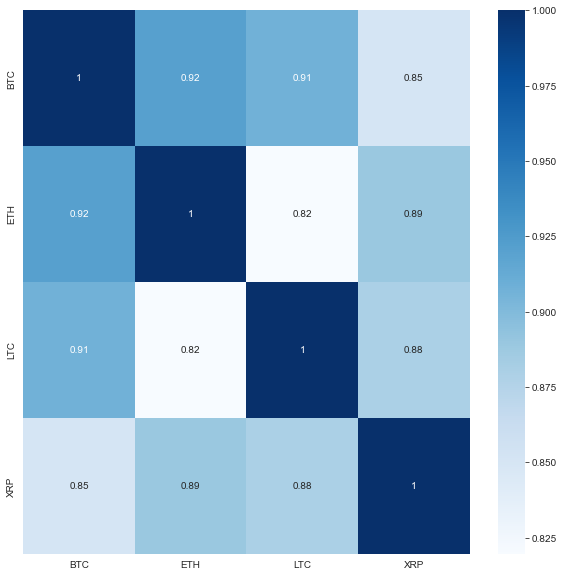

In [23]:
# price correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(ma_df[["BTC", "ETH", "LTC", "XRP"]].corr(), annot=True, cmap="Blues")

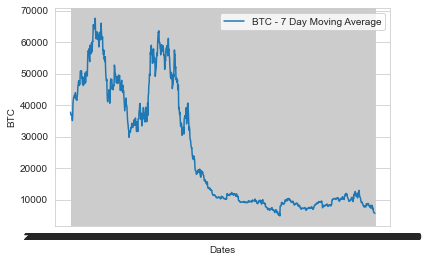

In [31]:
# plt.figure( figsize = (24, 10))
sns.lineplot(x = ma_df["date"], y = ma_df["BTC"], label = "BTC - 7 Day Moving Average")
plt.xlabel("Dates")
plt.show()